What You're Aiming For

In this checkpoint, i'll be working on 'Customer purchases history' dataset provided by Kaggle

Dataset description: This dataset contains historical records for customer purchases from a supermarket X. The objective is to find the association rules to help supermarket owners find new marketing plans to improve their sales.

➡️ Dataset link

🚧 Each row correspond to one purchase

https://i.imgur.com/uYpSaHm.png


Instructions

toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Run the apriori algorithm on the provided toy_dataset. Interpret the results.
Try to explore the checkpoint dataset using Pandas and Plotly.
Run the apriori algorithm on checkpoint dataset. Interpret the results and suggest a clear business plan to the supermarket owners based on your findings.

In [1]:
#installing mlxtend
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 275.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 275.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 275.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 275.8 kB/s eta 0:00:05
   ---- ----------------------------------- 0.2/1.4 MB 317.5 kB/s eta 0:00:05
   ---- ----------------------------------- 0.2/1.4 MB 317.5 kB/s eta 0:00:05
   ---- ----------------------------------- 0.2/1

In [2]:
#Importing the necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
toy_dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]
toy_df =pd.DataFrame(toy_dataset)
toy_df


,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


In [5]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(toy_dataset).transform(toy_dataset)

# Displaying the output
te_data

array([[False, False,  True, False, False,  True, False,  True, False,
         True,  True, False],
       [False, False,  True, False, False,  True, False, False, False,
         True,  True,  True],
       [ True, False, False,  True, False,  True,  True,  True, False,
        False, False, False],
       [ True,  True,  True,  True,  True, False, False,  True, False,
        False, False, False],
       [False,  True, False, False, False,  True, False,  True,  True,
         True, False, False]])

In [6]:
# Converting to DataFrame
onehot_df = pd.DataFrame(te_data, columns=te.columns_)

onehot_df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [7]:
# Support
# Setting a minimum support value to determine the frequency threshold for itemsets to be considered relevant.

frequent_itemcombinations = apriori(onehot_df, min_support = 0.2, use_colnames =True)
#min_support = 0.2' , this signifies that we are only interested in itemsets that appear like 20%

frequent_itemcombinations

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.2,(Necklace)
...,...,...
146,0.2,"(Scarf, Heels, Hat, Earrings, Necklace)"
147,0.2,"(Scarf, Shirt, Skirt, Earrings, Pants)"
148,0.2,"(Scarf, Sneakers, Skirt, Hat, Pants)"
149,0.2,"(Sunglasses, Sneakers, Skirt, Hat, Pants)"


In [9]:
# Association rules generated expressively
rules = association_rules(frequent_itemcombinations, metric = 'lift', min_threshold = 1)

# LIFT measures how much more likely two items are to be bought together than by chance
# MIN_THRESHOLD is used to filter the rules to only include those with a lift greater than 1

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Earrings),(Dress),0.4,0.4,0.2,0.500000,1.250000,0.04,1.2,0.333333
1,(Dress),(Earrings),0.4,0.4,0.2,0.500000,1.250000,0.04,1.2,0.333333
2,(Heels),(Dress),0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
3,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
4,(Dress),(Necklace),0.4,0.2,0.2,0.500000,2.500000,0.12,1.6,1.000000
...,...,...,...,...,...,...,...,...,...,...
1135,(Heels),"(Scarf, Dress, Hat, Earrings, Necklace)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6,1.000000
1136,(Dress),"(Scarf, Heels, Hat, Earrings, Necklace)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6,1.000000
1137,(Hat),"(Scarf, Heels, Dress, Earrings, Necklace)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
1138,(Earrings),"(Scarf, Heels, Dress, Hat, Necklace)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6,1.000000


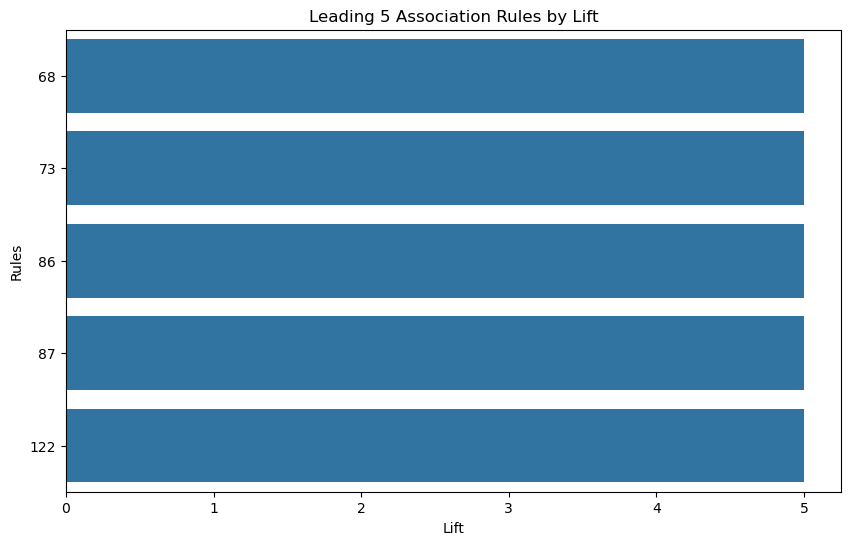

In [13]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Sort the rules by lift and select the top 5
top_rules = rules.nlargest(5, 'lift')

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules.index.astype(str), data=top_rules)
plt.title('Leading 5 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()

## Market Basket Optimisation

In [20]:
with open(r"C:\Users\Zione\Downloads\Market_Basket_Optimisation.csv", "r") as file:
    # Read the file line by line, strip any leading/trailing whitespace,
    # and split each line by commas to create a list of items (i.e., a transaction)
    data = [line.strip().split(',') for line in file]

# Display the first five transactions that occur (each transaction is a list of items)
for transaction in data[:5]:
    print(transaction)


['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [24]:
# Creating a One-Hot Encoded DataFrame for the items
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data, columns=te.columns_)
df


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
